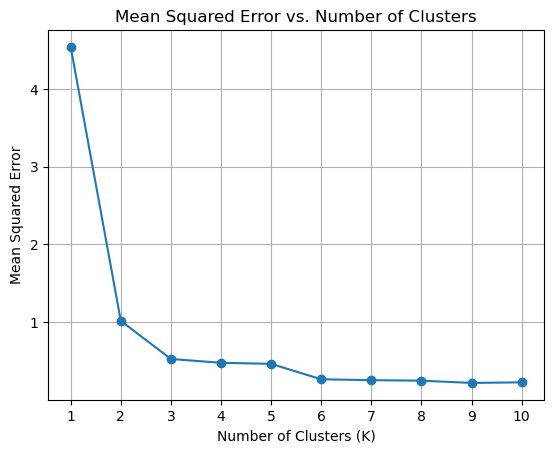

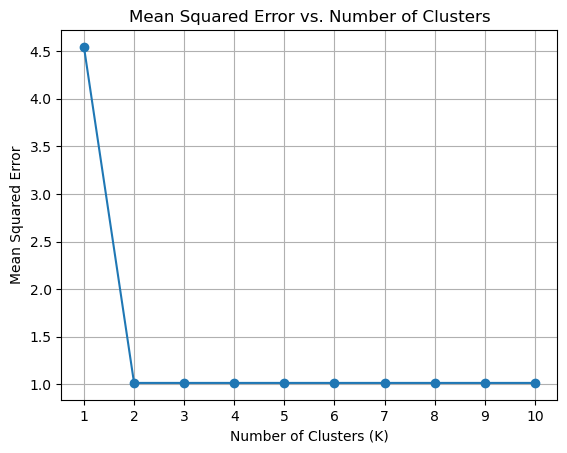

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import mean_squared_error

iris = load_iris()
X = iris.data

def initialize_centroids(X, k, method='random'):
    if method == 'random':
        centroids_idx = np.random.choice(X.shape[0], size=k, replace=False)
        centroids = X[centroids_idx]
    elif method == 'kmeans++':
        centroids = [X[np.random.choice(X.shape[0])]]
        while len(centroids) < k:
            distances = np.array([np.min(np.linalg.norm(X - c, axis=1))**2 for c in centroids])
            new_centroid_idx = np.argmax(distances)
            centroids.append(X[new_centroid_idx])
    return np.array(centroids)

def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis, :] - centroids, axis=2)
    distances[distances == 0] = np.inf  # Set zero distances to infinity to avoid division by zero
    return np.argmin(distances, axis=1)

def update_centroids(X, clusters, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        cluster_points = X[clusters == i]
        if cluster_points.any():  # Check if cluster is not empty
            centroids[i] = np.mean(cluster_points, axis=0)
    return centroids

def k_means(X, k, method='random', max_iter=100, tol=1e-4):
    centroids = initialize_centroids(X, k, method)
    prev_centroids = centroids.copy()
    for _ in range(max_iter):
        clusters = assign_clusters(X, centroids)
        centroids = update_centroids(X, clusters, k)
        if np.linalg.norm(centroids - prev_centroids) < tol:
            break
        prev_centroids = centroids.copy()
    
    mse = 0
    for i in range(k):
        cluster_points = X[clusters == i]
        mse += np.sum((cluster_points - centroids[i])**2)
    mse /= X.shape[0]  # Divide by the number of data points
    return clusters, centroids, mse

def plot_mse(X, k_range, method='random'):
    mse_values = []
    for k in k_range:
        _, _, mse = k_means(X, k, method)
        mse_values.append(mse)
    plt.plot(k_range, mse_values, marker='o')
    plt.title('Mean Squared Error vs. Number of Clusters')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Mean Squared Error')
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()

k_range = range(1, 11)
plot_mse(X, k_range)
plot_mse(X, k_range, method='kmeans++')
